## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [3]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('/home/user/Downloads/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [3]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [4]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
#5 Prepare  X (independent variables) and y (dependent variable)
x = df.drop(columns=['price'])
y = df['price']
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


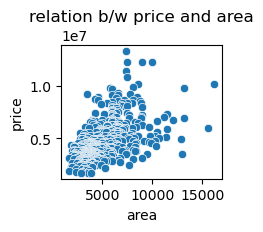

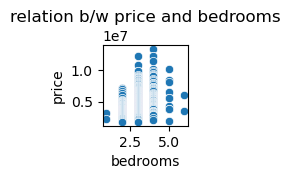

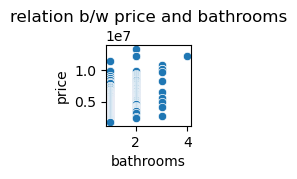

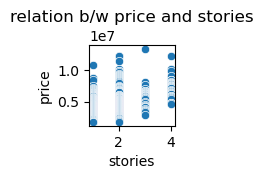

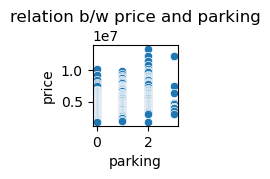

In [8]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import seaborn as sns
import matplotlib.pyplot as plt
columns=x.select_dtypes(include=['number']).columns
plt.figure(figsize=(12,8))
for i,col in enumerate(columns,1):
    plt.subplot(4,5,i)  
    sns.scatterplot(x=x[col],y=y)
    plt.ylabel("price")
    plt.xlabel(col)
    plt.title(f'relation b/w price and {col}')
    plt.show()

In [24]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

categorical_var=x.select_dtypes(include=["object"]).columns

binary_cols=[col for col in categorical_var if x[col].nunique()==2]
labelencoder=LabelEncoder()
for col in  binary_cols:
    x[col]=labelencoder.fit_transform(x[col])

multicat_cols=[col for col in categorical_var if col not in  binary_cols]

X = pd.get_dummies(x, columns=multicat_cols,drop_first=True).astype(int)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,1,1,1,0,0,0,0,1,1,1,0,0
1,1,1,5,2,0,0,0,0,1,2,0,0,0
2,2,0,1,0,0,0,1,0,0,1,1,1,0
3,1,1,1,0,0,0,1,0,1,2,1,0,0
4,1,1,0,0,0,2,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,-1,0,0,0,0,1,0,0,1,0,0,1
541,-1,0,0,0,-2,0,0,0,0,0,0,1,0
542,0,-1,0,0,0,0,0,0,0,0,0,0,1
543,-1,0,0,0,-2,0,0,0,0,0,0,0,0


In [25]:
#8  Avoiding the Dummy Variable Trap


# Convert categorical column into dummy variables, dropping the firs


In [27]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
# columns=x.select_dtypes(include=['number']).columns
# scalar=StandardScaler()
# x[columns]=scalar.fit_transform(x[columns])
# x
scaler = StandardScaler()
x[x.select_dtypes(include=["number"]).columns] = scaler.fit_transform(x.select_dtypes(include=["number"]))
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,furnished
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,furnished
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,semi-furnished
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,furnished
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,unfurnished
541,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,semi-furnished
542,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,unfurnished
543,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,furnished


In [30]:
x.dtypes
labelencoder=LabelEncoder()
x['furnishingstatus'] = labelencoder.fit_transform(x['furnishingstatus'])
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,0
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,0
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,1
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,0
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,2
541,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1
542,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,2
543,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,0


In [31]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [32]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
model=LinearRegression()
data = model.fit(x_train,y_train)
data

LinearRegression()

In [33]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred = model.predict(x_train)
error = y_pred - y_train
error

126   -5.477012e+05
363   -1.499996e+05
370    7.643610e+05
31    -1.977171e+06
113    2.678948e+05
           ...     
71    -1.913138e+05
106    2.095515e+05
270    1.985625e+06
435   -4.325689e+05
102    9.410638e+05
Name: price, Length: 381, dtype: float64

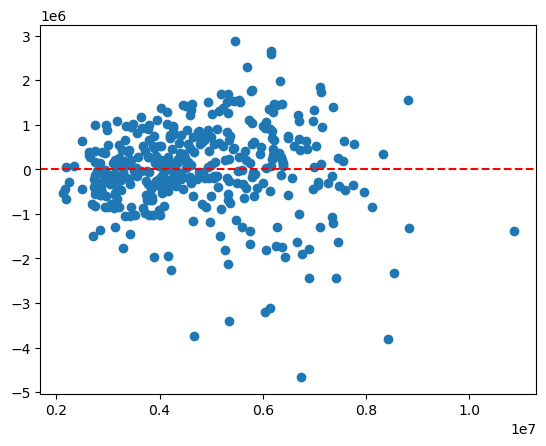

In [36]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_pred,error)
plt.axhline(y=0,color="red",linestyle='--')

plt.show()

In [39]:
#14  Predic on the test set
Y_pred = model.predict(x_test)
error = Y_pred - y_test
error

316    1.347509e+06
77     4.471855e+05
360   -6.545376e+05
90    -1.963055e+06
493    5.159837e+05
           ...     
395    2.969026e+05
425    7.702624e+05
195    2.088249e+06
452    2.267344e+06
154   -3.491663e+05
Name: price, Length: 164, dtype: float64

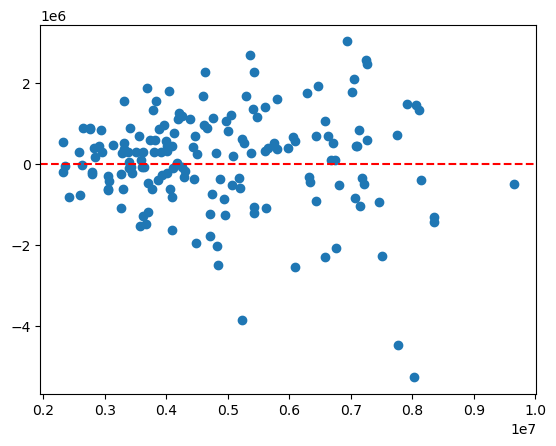

In [40]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(Y_pred,error)
plt.axhline(y=0,color="red",linestyle="--")
plt.show()

In [43]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,Y_pred)
r2=r2_score(y_test,Y_pred)
r2

0.6435419628959107

In [45]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
def adjusted(r2,n,k):
 return 1-((1-r2)*(n-1)/(n-k-1))

adj_r2 = adjusted(r2,x_test.shape[0],x_test.shape[1])
adj_r2

0.615214171867771